In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
# Solve memory issues with OpenMP
# https://stackoverflow.com/questions/75521871/vscode-jupyter-notebook-crash-in-cell
import os

os.environ["KMP_DUPLICATE_LIB_OK"] = "TRUE"

In [3]:
from script.calc_statistics import get_sim_dates, get_sim_df
from script.plot_maps import create_route_plot, plot_context_map
from script.plot_results import camp_displacement, displacement_over_time, error_matrix
from script.plot_water import plot_water_level
from src.create_config_files import (
    create_data_layout,
    create_flood_level_csv,
    create_floodawareness_csv,
    create_source_data_files,
)
from src.water_classification import classify_water_level

In [4]:
plt.style.use("bmh")
plt.rcParams["axes.labelsize"] = 18
plt.rcParams["axes.titlesize"] = 20
plt.rcParams["xtick.labelsize"] = 16
plt.rcParams["ytick.labelsize"] = 16

# Configs

In [5]:
# Figure configuration
FIG_DPI = 300
FIG_SIZE = (8, 6)

# Data configuration
PATH = "config_files/dflee_myanmar/"


# Load data
Water level data from [https://www.moezala.gov.mm/](https://www.moezala.gov.mm/) based on forecast.

Confirmed with news sources.

In [6]:
toungoo_df = pd.read_csv("input_data/area/Toungoo_Waterlevel.csv", sep=",")
toungoo_df.head()

Date    Rivers Stations  Danger level (CM)  \
0  2024-09-08  Sittoung  Toungoo                600   
1  2024-09-09  Sittoung  Toungoo                600   
2  2024-09-10  Sittoung  Toungoo                600   
3  2024-09-11  Sittoung  Toungoo                600   
4  2024-09-12  Sittoung  Toungoo                600   

   Water level at (12:30) hr (cm)  \
0                             564   
1                             549   
2                             552   
3                             593   
4                             656   

   Water level changes during last (24) hr (cm)  \
0                                           -11   
1                                           -15   
2                                             3   
3                                            41   
4                                            63   

   Water level forecast at next (24) hrs (cm)  \
0                                         554   
1                                         534   
2                                         562   
3                                         638   
4                                         716   

                                             Remarks  Day  \
0                                                NaN    8   
1                                                NaN    9   
2                                                NaN   10   
3  It may exceeded its above danger level during ...   11   
4  It may rise about 2 feet during the next 1 day...   12   

   Water Level Classification  
0                           0  
1                           0  
2                           0  
3                           0  
4                           1

In [7]:
x = 5  # Replace with your desired maximum classification value

min_level = toungoo_df["Water level at (12:30) hr (cm)"].min()
max_level = toungoo_df["Water level at (12:30) hr (cm)"].max()
danger_level = toungoo_df["Danger level (CM)"][0]

toungoo_df["Water Level Classification"] = toungoo_df[
    "Water level at (12:30) hr (cm)"
].apply(classify_water_level, args=(danger_level, max_level, x))

print(f"Min: {min_level}, Max: {max_level}")
print(toungoo_df[["Water level at (12:30) hr (cm)", "Water Level Classification"]])

Min: 527, Max: 805
    Water level at (12:30) hr (cm)  Water Level Classification
0                              564                           0
1                              549                           0
2                              552                           0
3                              593                           0
4                              656                           1
5                              735                           3
6                              805                           5
7                              774                           4
8                              744                           4
9                              726                           3
10                             716                           3
11                             710                           3
12                             700                           2
13                             698                           2
14                             692  

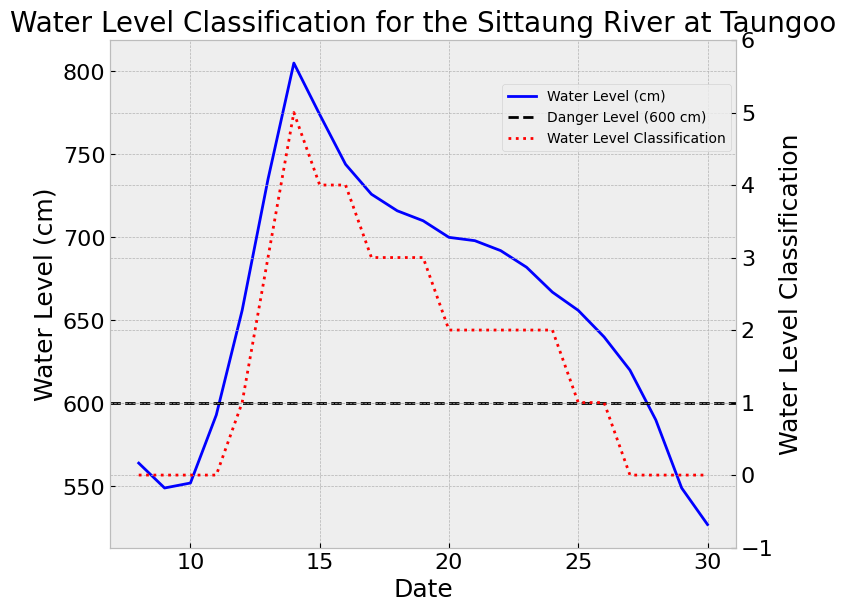

In [8]:
plot_water_level(
    toungoo_df,
    danger_level,
    x,
    title="Water Level Classification for the Sittaung River at Taungoo",
    FIG_DPI=FIG_DPI,
    FIG_SIZE=FIG_SIZE,
)

# Locations
https://www.google.com/maps/d/u/0/edit?mid=1MmdvhUt0CL0N00Qw0RuPRlaNP8C06Ps&usp=sharing

![locations](plots/locations_Toungoo.png)

Temples were chosen based on religious centers identified through Google Maps. Flood zones were selected using maps of inhabited areas, and the same approach was used for towns, ensuring they were not located beside the river. It was assumed that Toungoo was protected from flooding due to its significance. The route connecting these locations was determined using Google Maps directions.

The camps were established in higher elevated areas and large spaces, such as the university. Due to the available infrastructure, multiple camps were set up in the city of Toungoo.

Future research could improve on this map!

# Route visualization

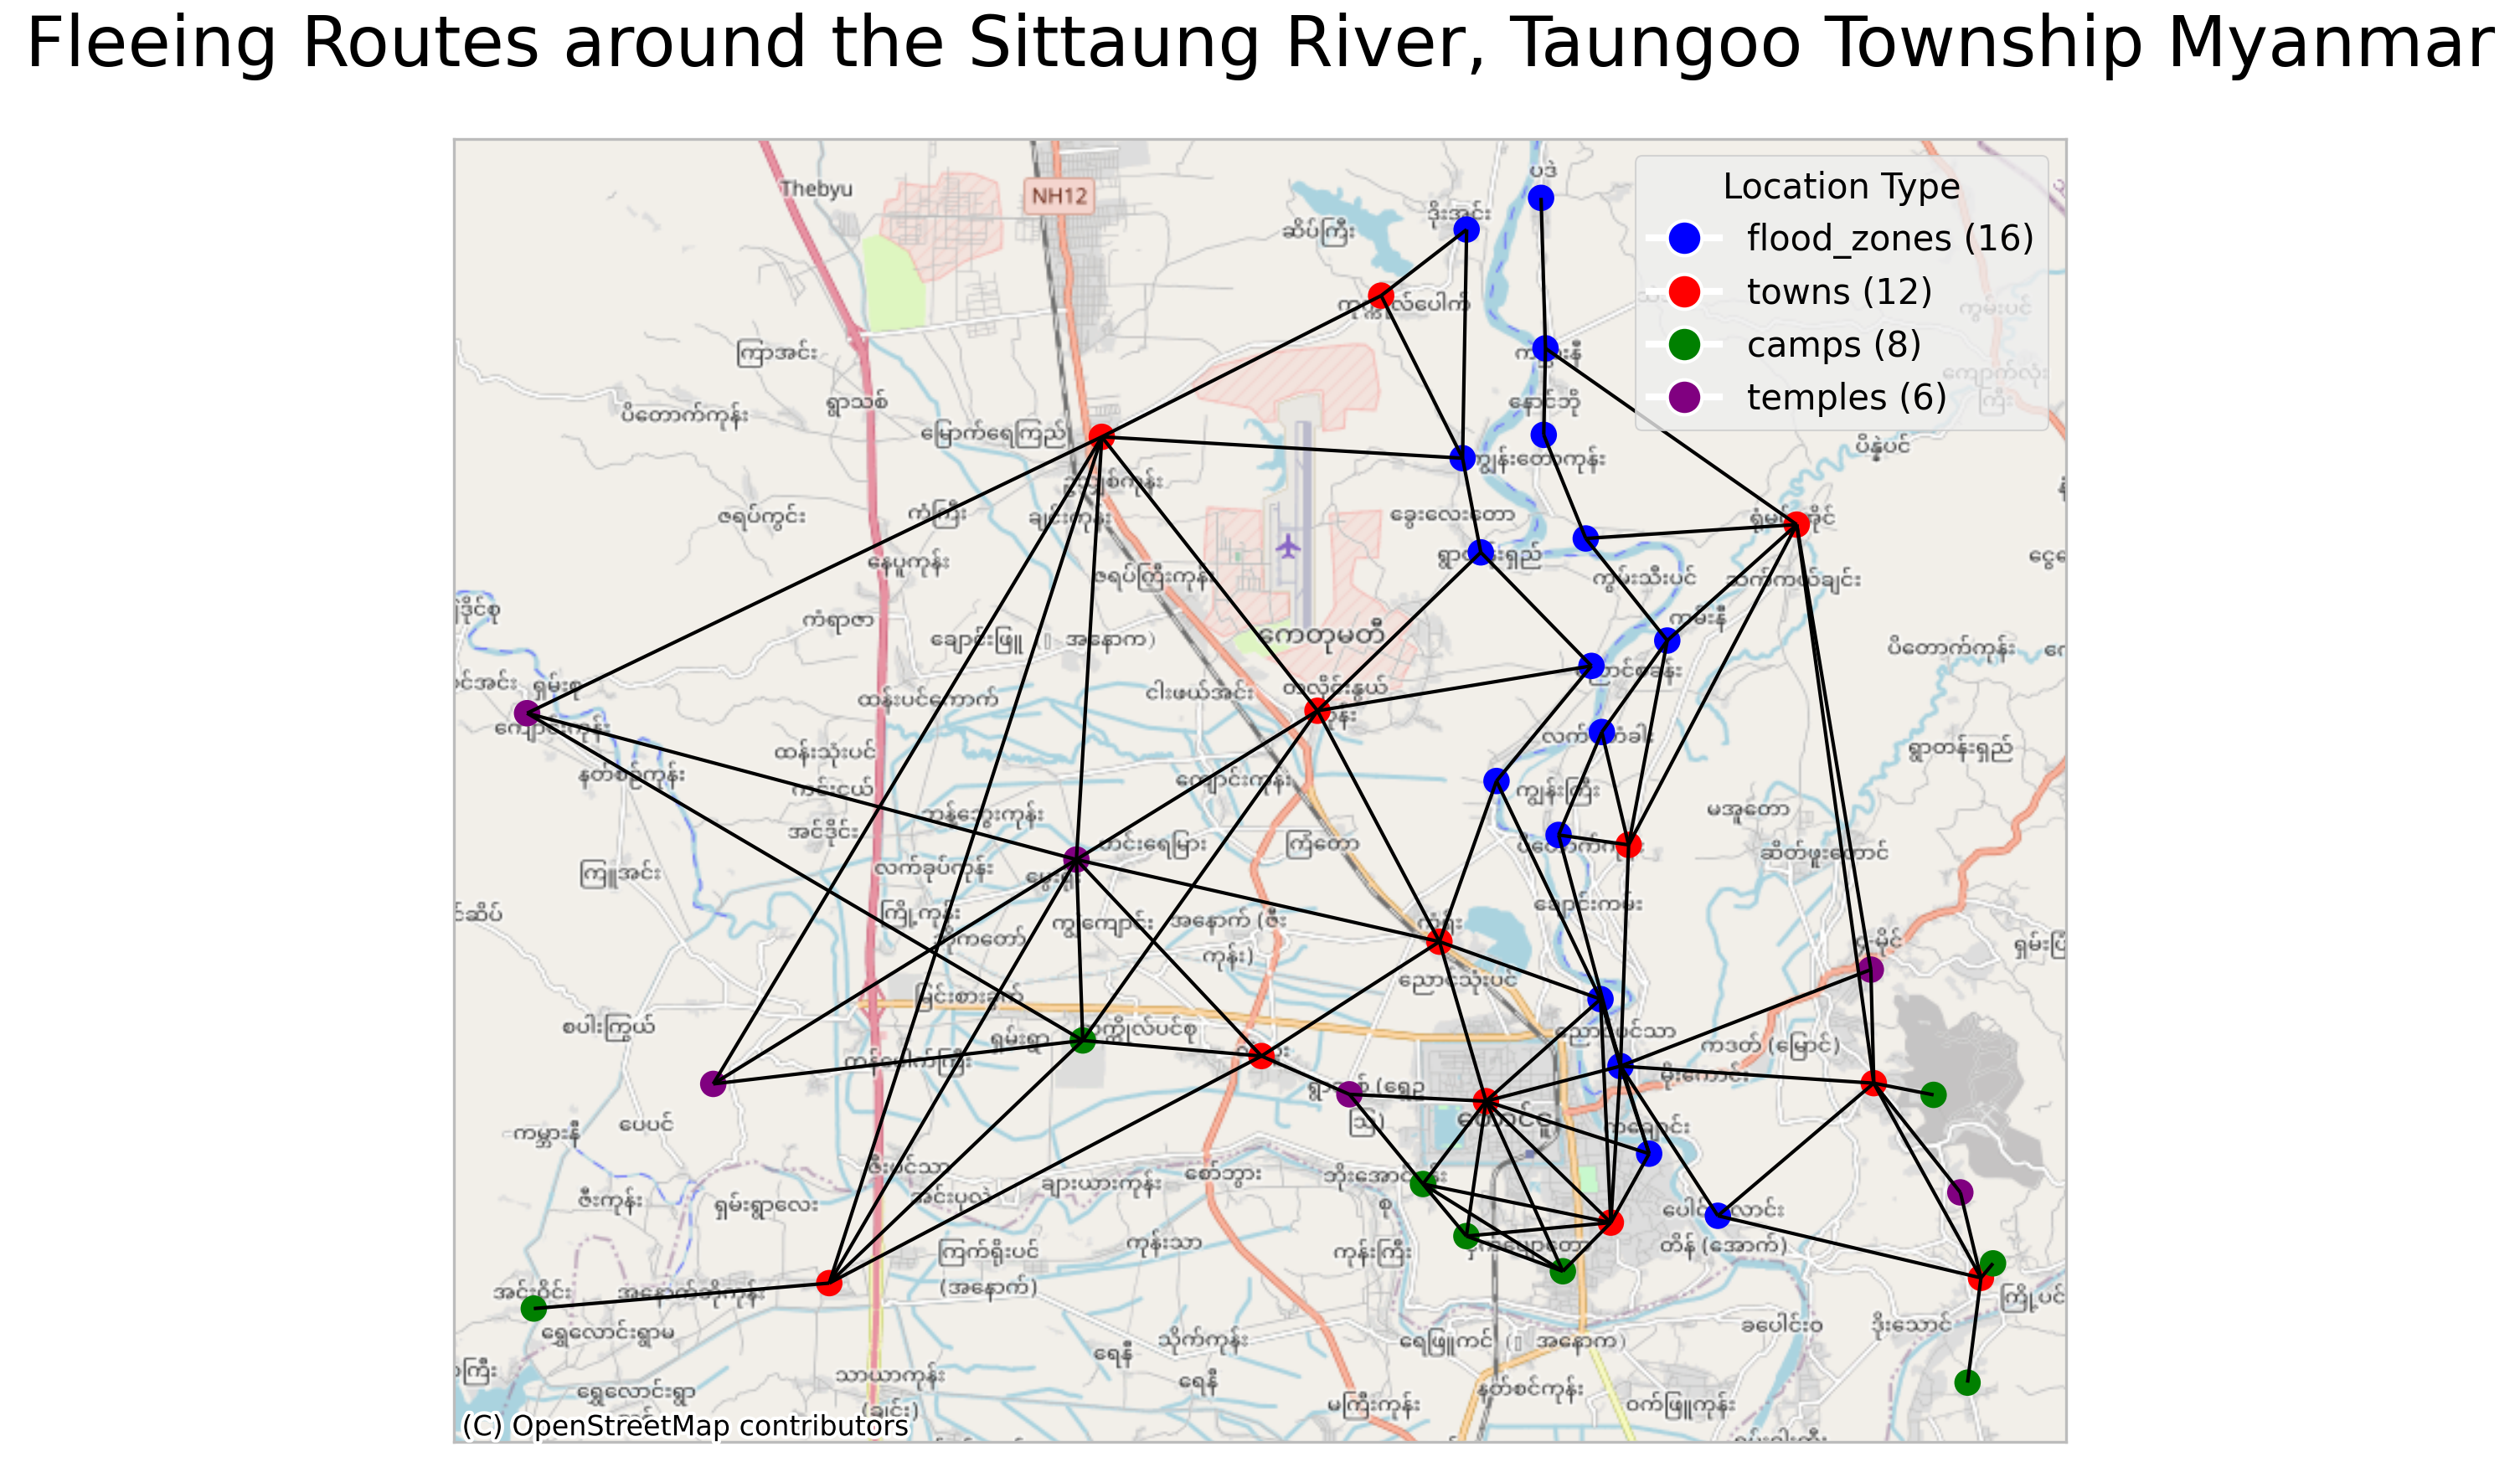

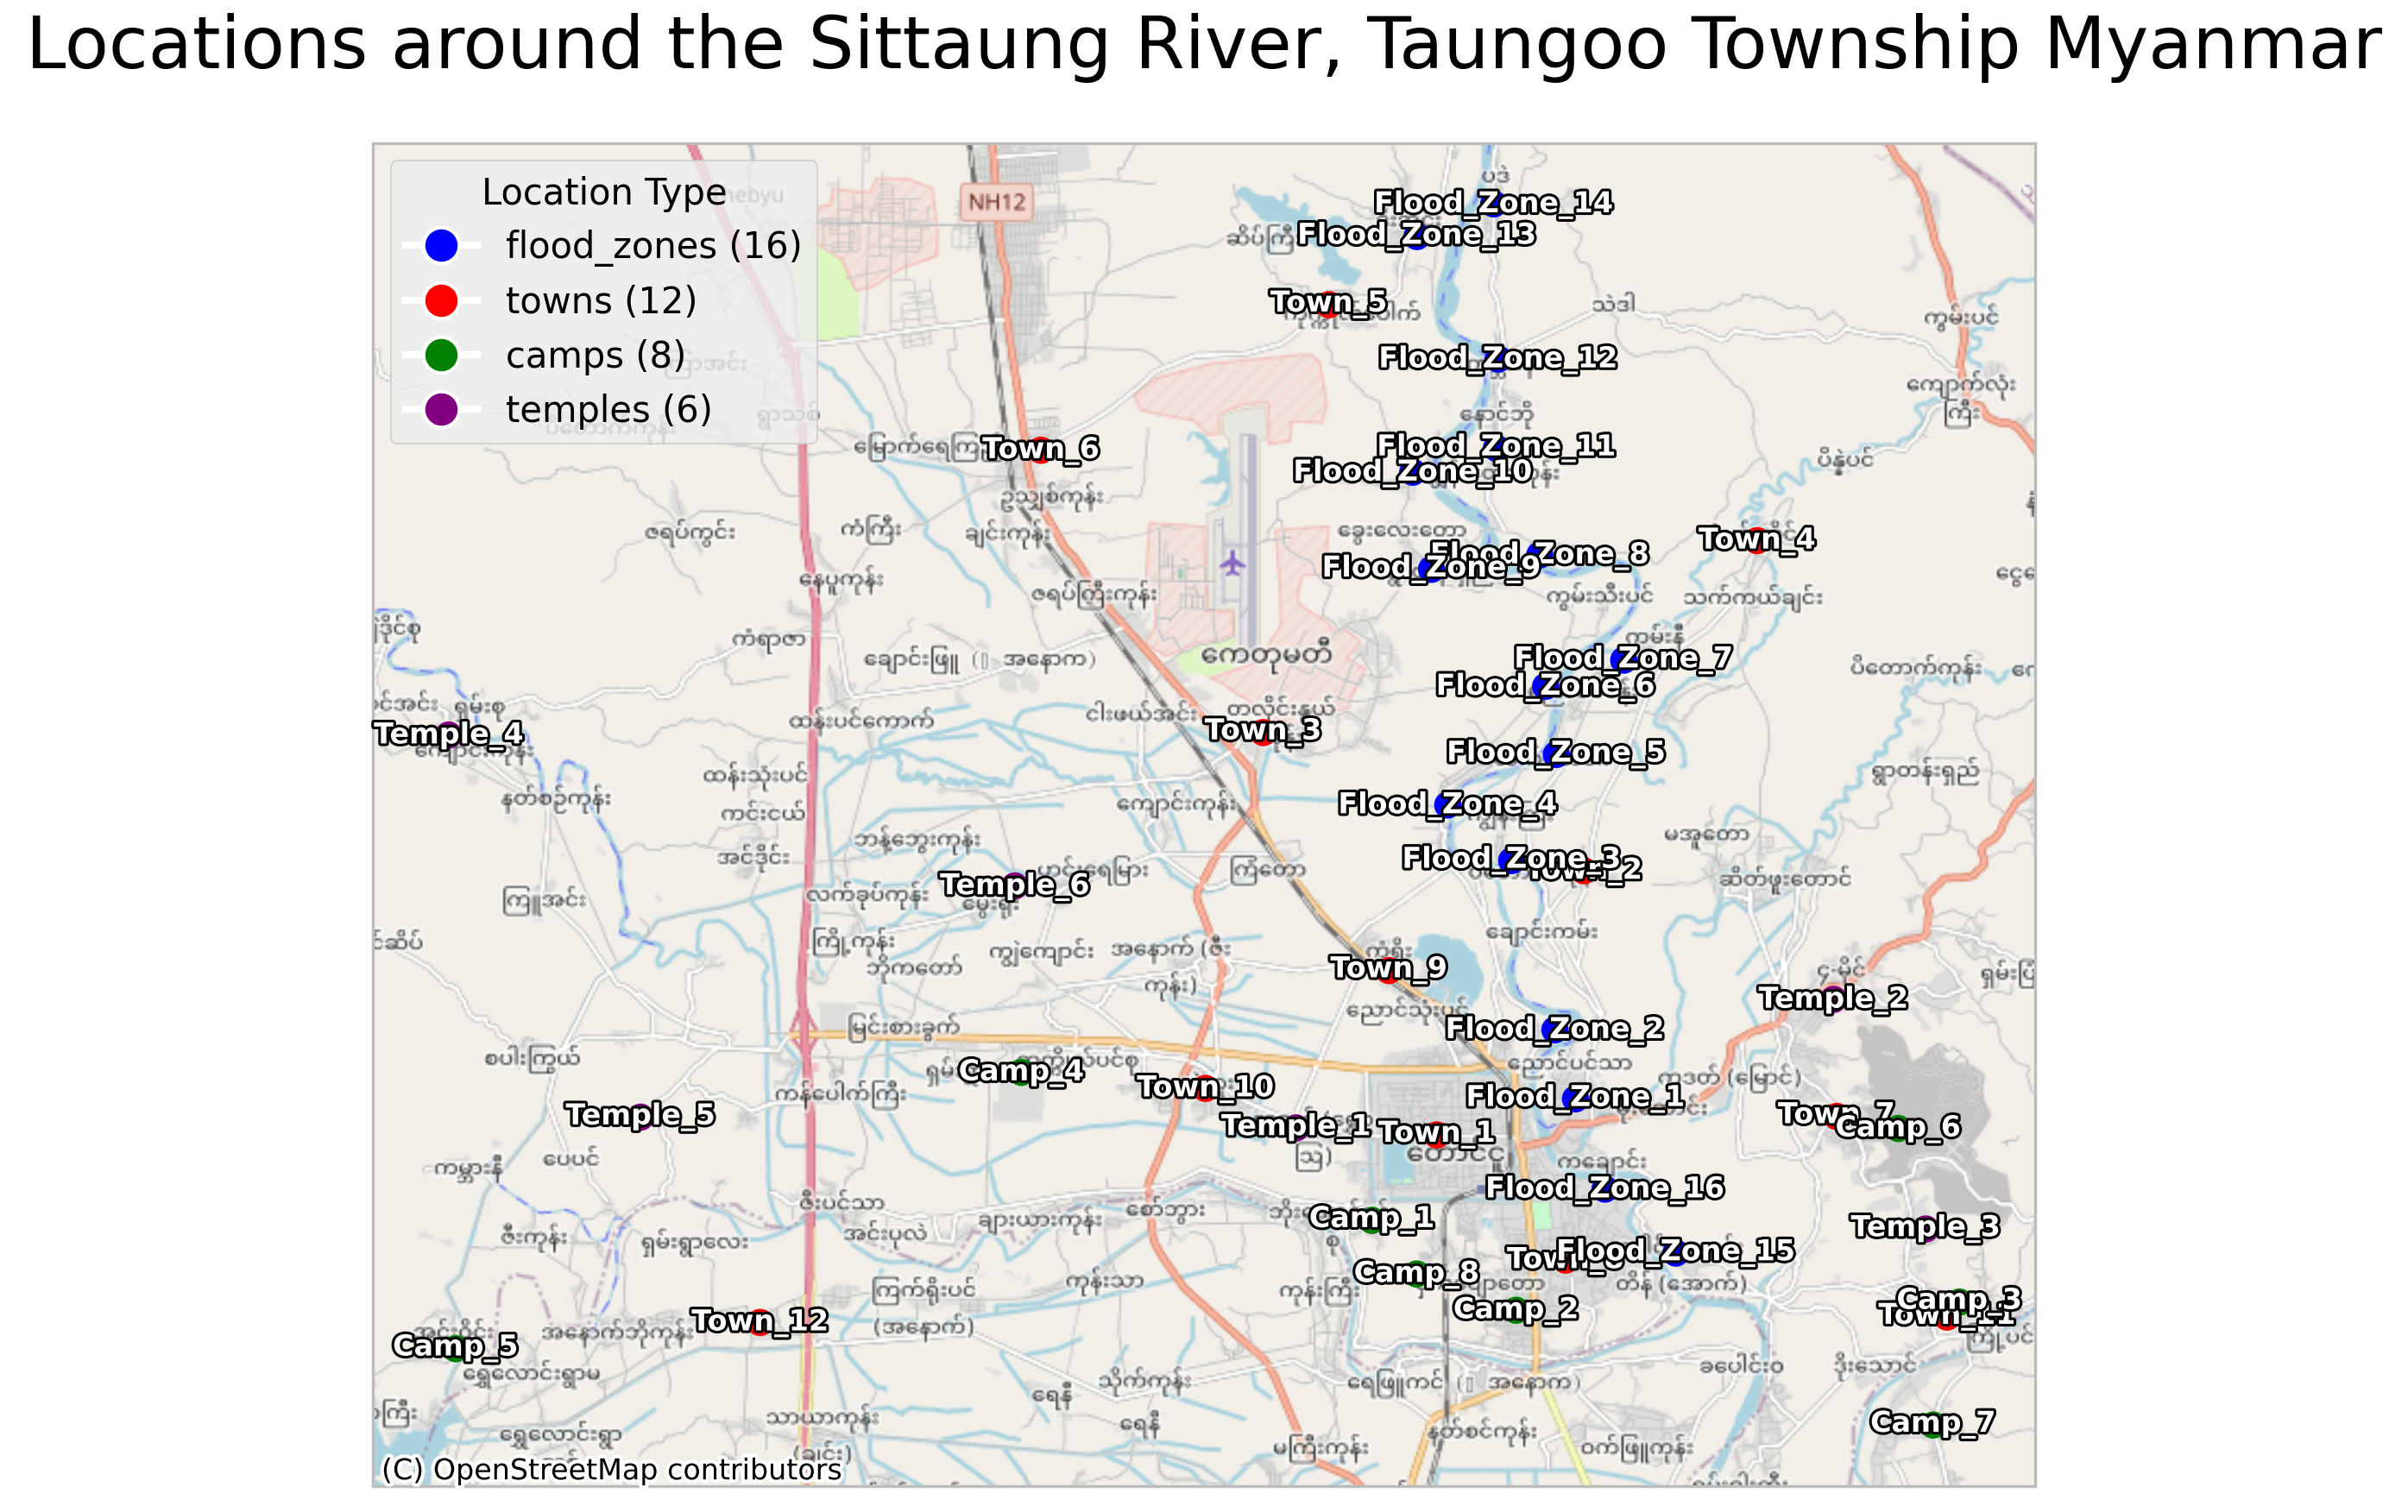

In [9]:
create_route_plot(FIG_DPI=FIG_DPI, FIG_SIZE=FIG_SIZE, PATH=PATH)

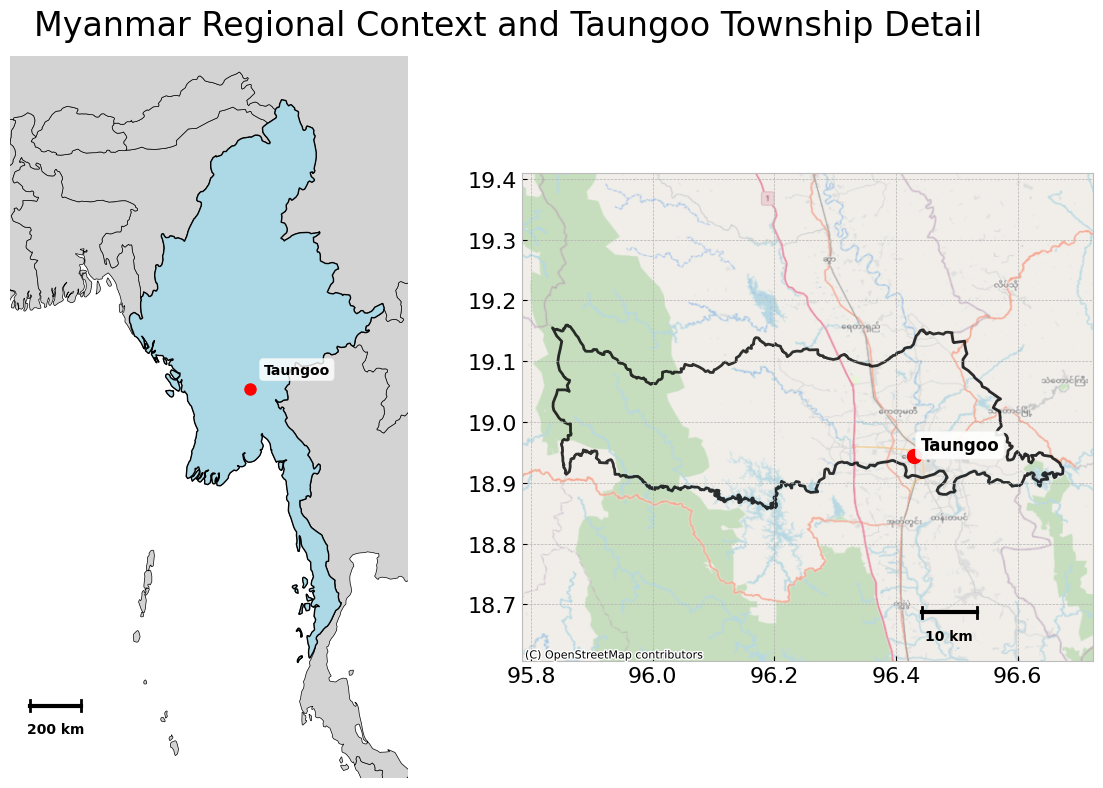

In [10]:
plot_context_map()

# Create config files

In [11]:
create_flood_level_csv(toungoo_df, PATH)

flood_awareness = np.array([0.0, 0.1, 0.2, 0.5, 0.7, 1.0])
create_floodawareness_csv(flood_awareness, PATH)

create_source_data_files(PATH)

create_data_layout(PATH)

Displacement to camps: 581, Floodzone population: 972


# Plot results

In [12]:
df_5000, df_12000, df_lesshubs, df_lessshelters = get_sim_df()
days, daytick_labels = get_sim_dates(df_5000)

Amount of simulation runs: 126


In [13]:
days = np.arange(0, 23)
data = np.concatenate((np.zeros(6, dtype=int), np.full(17, 5000, dtype=int)))
df_validation = pd.DataFrame({"days": days, "displacement_data": data})

In [14]:
error_matrix(df_5000, daytick_labels, subtitle="5000 Displaced Individuals")
error_matrix(df_12000, daytick_labels, subtitle="12000 Displaced Individuals")
error_matrix(df_lesshubs, daytick_labels, subtitle="Less Hubs")
error_matrix(df_lessshelters, daytick_labels, subtitle="Less Shelters")

In [15]:
error_matrix(
    df_5000, daytick_labels, subtitle="5000 Displaced Individuals", normalize=True
)
error_matrix(
    df_12000, daytick_labels, subtitle="12000 Displaced Individuals", normalize=True
)
error_matrix(df_lesshubs, daytick_labels, subtitle="Less Hubs", normalize=True)
error_matrix(df_lessshelters, daytick_labels, subtitle="Less Shelters", normalize=True)

In [16]:
displacement_over_time(
    days,
    [df_validation["displacement_data"]],
    [None],
    daytick_labels,
    ["Validation Data"],
    name="validation",
)

displacement_over_time(
    days,
    [df_validation["displacement_data"], df_5000["total refugees (simulation)"]],
    [None, df_5000["total refugees (simulation) (std)"]],
    daytick_labels,
    ["Validation Data", "5000 Displaced Individuals"],
)

displacement_over_time(
    days,
    [
        df_validation["displacement_data"],
        df_5000["total refugees (simulation)"],
        df_12000["total refugees (simulation)"],
        df_lesshubs["total refugees (simulation)"],
        df_lessshelters["total refugees (simulation)"],
    ],
    [
        None,
        df_5000["total refugees (simulation) (std)"],
        df_12000["total refugees (simulation) (std)"],
        df_lesshubs["total refugees (simulation) (std)"],
        df_lessshelters["total refugees (simulation) (std)"],
    ],
    daytick_labels,
    [
        "Validation Data",
        "5000 Displaced Individuals",
        "12000 Displaced Individuals",
        "Less Hubs",
        "Less Shelters",
    ],
)

In [17]:
camp_displacement(
    days,
    [df_5000, df_12000, df_lesshubs, df_lessshelters],
    [
        "5000 Displaced Individuals",
        "12000 Displaced Individuals",
        "Less Hubs",
        "Less Shelters",
    ],
    daytick_labels,
    N_camps=8,
)

camp_displacement(
    days,
    [df_5000, df_12000, df_lesshubs, df_lessshelters],
    [
        "5000 Displaced Individuals",
        "12000 Displaced Individuals",
        "Less Hubs",
        "Less Shelters",
    ],
    daytick_labels,
    N_camps=6,
    is_camp=False,
)